<a href="https://colab.research.google.com/github/MounicaSubramanium/R-Language/blob/master/Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[QPID Machine Learning/Data Science Challenge](#scrollTo=0rfF7yE_Nzsx)

>>[Introduction](#scrollTo=rm6JUOo3PkQ3)

>>>[Problem Statement](#scrollTo=tcXSWw-895ez)

>>[Details](#scrollTo=GZh7-oC8ELQh)

>>>[Downloading the Dataset](#scrollTo=NkkA0ZzePwI8)

>>>[Dataset Description](#scrollTo=mEXwMJQ-VWoR)

>>>[Hints](#scrollTo=Tg8y-zLlxZNQ)

>>>[Import Libraries](#scrollTo=JBt8Ino7PGDz)

>>>[Code Samples](#scrollTo=i38zIcCZXg33)

>>[Tasks](#scrollTo=TJTdm_qNYqqb)

>>>[Part 1: Modeling](#scrollTo=2hcyIkRSXg82)

>>>[Part 2: Additional Questions](#scrollTo=8VSLpzIMXg_a)

## Introduction

We'd like to get a better sense of your approach to and intuition for machine learning, natural language processing, data science, as well as your other technical and analytical skills. To that end, we'd like you to complete this ML challenge. 

In this challenge, we provide you with some code samples using `pandas` and `scikit-learn`. You may use other python libraries as well as reference online resources to complete this challenge.

This is an interactive Jupyter notebook that allows you to write, comment on, and execute python code directly on Google's servers. If you are new to Jupyter notebooks, you can read more about them here: [https://jupyter.org/](https://jupyter.org/). **Please edit this notebook directly** and take as much time as you feel is reasonable to complete this exercise. 



**Please email nick.botchan@evicore.com, vpartridge@evicore.com when you are done so that we can review the changes you've made to this notebook.**

### Problem Statement
The goal of this notebook is to develop a model that predicts whether self-reported severity of [fibromyalgia](https://en.wikipedia.org/wiki/Fibromyalgia) **IMPROVED**, **WORSENED**, or stayed the **SAME** over a variable period of time for patients who have this condition. Below are instructions about how to download the data, as well as some sample code that generates such predictions. 

**Your goal is to improve on this model and show us how you think through such a problem.**

## Tasks

This challenge consists of two parts: modeling and addressing additional questions. The first part is to train a model and predict the change in status of fibromyalgia. The second part is to answer some questions in regards to your approach. 


### Part 1: Modeling



1.   We will evaluate your results on a held-out test set. Therefore, please make sure that your code is clearly documented, so that we can easily run **your code** against our test set. The test set is formatted exactly the same as the dataset set we provided. **You will not be judged solely on the performance of the model.** We are also interested in your creativity and problem solving approach.  
2.   Please report on how well the model did. You may choose to whatever metrics you find appropriate.


### Part 2: Additional Questions

Please answer the following questions at the bottom of the notebook when you have completed part 1:

1.   If you've explored the data, please describe your observations about the dataset. 
2.   What approach (i.e. modeling & evaluation) did you use?
3.   What features have you tried (please also include the ones that you do not include in your final model)?
4.   Why did you use this approach?
5.   How would you improve your model if you had more time?

## The Dataset

### Downloading the Dataset

The following is a function to download the datasets and then import it as a pandas `DataFrame` object. 

You may need to sign in with your Google account when prompted.

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import io
import json

In [0]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
def download_dataset(file_id):
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  # Download a file based on its file ID.
  downloaded = drive.CreateFile({'id': file_id})
  content = downloaded.GetContentString()
  
  return pd.read_csv(io.StringIO(content))
  

### Dataset Description

The dataset you will be using is a subset of the Chronic Illness dataset on Kaggle: https://www.kaggle.com/flaredown/flaredown-autoimmune-symptom-tracker



Flaredown is an app that helps patients of chronic autoimmune and invisible illnesses improve their symptoms by avoiding triggers and evaluating their treatments. Each day, patients track their symptom severity, treatments and doses, and any potential environmental triggers (foods, stress, allergens, etc) they encounter.

**About the data**

Instead of coupling symptoms to a particular illness, Flaredown asks users to create their unique set of conditions, symptoms and treatments (“**trackables**”). They can then “check-in” each day and record the severity of symptoms and conditions, the doses of treatments, and “tag” the day with any unexpected environmental factors.

**Condition**: an illness or diagnosis, for example Rheumatoid Arthritis, rated on a scale of **0 (not active) to 4 (extremely active)**.

**Symptom**: self-explanatory, also rated on a 0–4 scale.

**Treatment**: anything a patient uses to improve their symptoms, along with an optional dose, which is a string that describes how much they took during the day. For instance “3 x 5mg”.

**Tag**: a string representing an environmental factor that does not occur every day, for example “ate dairy” or “rainy day”.

**Food**: food items were seeded from the publicly-available USDA food database. Users have also added many food items manually.

**Weather**: weather is pulled automatically for the user's postal code from the Dark Sky API. Weather parameters include a description, precipitation intensity, humidity, pressure, and min/max temperatures for the day.

If users do not see a symptom, treatment, tag, or food in our database (for instance “Abdominal Pain” as a symptom) they may add it by simply naming it. This means that the data requires some cleaning, but it is patient-centered and indicates their primary concerns.



The following is a snippet of what the original dataset looks like:

In [0]:
sample_file_id = '1r4afwYJ3JC_8kJFMKbYea_7vnnXaFb1r'
sample_df = download_dataset(sample_file_id)

In [7]:
sample_df.head(10)

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
0,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,99,Condition,Back pain,1
1,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,199,Condition,Chest pain,0
2,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,582,Condition,Knee pain,1
3,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,697,Condition,Neck pain,2
4,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,1133,Condition,Rib pain,1
5,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,1134,Condition,Shoulder pain,1
6,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,1135,Condition,Ankle Pain,3
7,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,1136,Condition,Hip Pain,3
8,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,1137,Condition,Stomach Pain,0
9,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,1138,Condition,Face Pain,1


The dataset we provided is a subset of the original dataset, and we grouped all the `trackable_type`, `trackable_name`, and `trackable_value` of a patient/user within a `checkin_date` into one JSON array. 

For example: those 10 rows in the `DataFrame` above belong to the same user within the same `checkin_date`, so the trackable columns are aggregated into a JSON array as following:

In [8]:
sample_df.head(10)[['trackable_type', 'trackable_name', 'trackable_value']].to_json(orient='records')

'[{"trackable_type":"Condition","trackable_name":"Back pain","trackable_value":1},{"trackable_type":"Condition","trackable_name":"Chest pain","trackable_value":0},{"trackable_type":"Condition","trackable_name":"Knee pain","trackable_value":1},{"trackable_type":"Condition","trackable_name":"Neck pain","trackable_value":2},{"trackable_type":"Condition","trackable_name":"Rib pain","trackable_value":1},{"trackable_type":"Condition","trackable_name":"Shoulder pain","trackable_value":1},{"trackable_type":"Condition","trackable_name":"Ankle Pain","trackable_value":3},{"trackable_type":"Condition","trackable_name":"Hip Pain","trackable_value":3},{"trackable_type":"Condition","trackable_name":"Stomach Pain","trackable_value":0},{"trackable_type":"Condition","trackable_name":"Face Pain","trackable_value":1}]'

For this challenge, we want to compare the `trackable_value`, i.e. severity, of the condition of a user between two closest recorded dates in the dataset. (Please run the following code to download the training dataset.)

In [0]:
train_file_id = '1hDM1VfaZ7o1moBN1IlcaFExfoE2Jeqgg'
dataframe = download_dataset(train_file_id)
dataframe['entries_from'] = dataframe.entries_from.apply(json.loads)
dataframe['entries_to'] = dataframe.entries_to.apply(json.loads)

In [10]:
dataframe.head()

,user_id,checkin_date_from,checkin_date_to,status,value_from,value_to,entries_from,entries_to,age,sex,country
0,2939,10/29/17,11/1/17,WORSENED,3,4,"[{'trackable_type': 'Symptom', 'trackable_name...","[{'trackable_type': 'Symptom', 'trackable_name...",37,female,CA
1,5525,9/24/17,9/26/17,IMPROVED,4,3,"[{'trackable_type': 'Condition', 'trackable_na...","[{'trackable_type': 'Condition', 'trackable_na...",24,female,GB
2,2586,6/22/17,6/23/17,SAME,3,3,"[{'trackable_type': 'Condition', 'trackable_na...","[{'trackable_type': 'Condition', 'trackable_na...",43,female,US
3,312,7/29/17,7/30/17,SAME,2,2,"[{'trackable_type': 'Condition', 'trackable_na...","[{'trackable_type': 'Condition', 'trackable_na...",23,female,AU
4,3064,5/30/15,5/31/15,WORSENED,1,2,"[{'trackable_type': 'Condition', 'trackable_na...","[{'trackable_type': 'Condition', 'trackable_na...",44,male,FR


  Columns with the `from` suffix contain the records from the same earlier date, and the ones with the `to` suffix have the records from a later date. `entries_from` and `entries_to` columns are the aggregated JSON arrays mentioned above. 
  
  Take the first row as example, the JSON array in the `entries_from` column contains all the `trackable` entries on the date (10/29/17) in `checkin_data_from` column, whereas that in the `entries_to` column contains all the `trackable` entries on the date (11/1/17) specified in the `checkin_data_to` column. 
  
  The `status` column has three values: `IMPROVED`, `WORSENED`, and `SAME`. If the value in `value_from` is greater than that in `value_to`, that means the condition of a user has worsened between those two check-in dates; if `value_from` is less than `value_to` that means the condition has improved. If those two values are the same, that means the condition has remained the same. 
  
  We ask you to build a model to predict the `status` of a patient's condition, whether it's `WORSERNED`, `IMPROVED`, or `SAME`.

### Hints

We strongly encourage you to look at the values in the `entries_from` and `entries_to` columns and extract useful features from there. And please note that `trackable_value` can be free text. 

## Your Solution 

The following is a working code sample. You are free to use the following code as part of your solution.

### Import Libraries

In [0]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np    
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import svm
from sklearn import metrics

### Generate Predictions



In [0]:
# download the dataset
train_file_id = '1hDM1VfaZ7o1moBN1IlcaFExfoE2Jeqgg'
dataframe = download_dataset(train_file_id)
dataframe['entries_from'] = dataframe.entries_from.apply(json.loads)
dataframe['entries_to'] = dataframe.entries_to.apply(json.loads)

In [0]:
example_df = dataframe.copy()

In [0]:
def encode_labels(label):
    if label == 'IMPROVED':
        return 0
    elif label == 'WORSENED':
        return 1
    else:
        return 2

In [0]:
class ItemSelector(TransformerMixin):
    """This class allows you to select a subset of a dataframe based on a given column name.
    If as_feature is False, you will need to pass the data to another Transformer to convert it into features; 
    otherwise, scikit-learn will throw dimension related exception.
    If as_feature is True, the column from that dataframe you just pass in will be use as feature directly. 
    For example, if 'key' is set to 'age' from the dataset, the values from the 'age' column will be used as features
    without the need for another Transformer.
    """
    def __init__(self, key, as_feature=False):
        self.key = key
        self.as_feature = as_feature

    def fit(self, x, y=None):
        return self

    def transform(self, dataframe):
        if self.as_feature:
            return dataframe[[self.key]]
        return dataframe[self.key]

In [0]:
dataframe['y'] = example_df.status.apply(encode_labels)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dataframe, dataframe['y'], train_size=0.8, random_state=23123)

In [0]:
pipeline = Pipeline([
        
    ('union', FeatureUnion(
        transformer_list=[
        
            ('age', Pipeline([
                ('selector', ItemSelector('age', as_feature=True))
            ])),
            
            
        ],

    )),

    # Use a naive bayes classifier on the combined features
    ('clf', BernoulliNB()),
])


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [185]:
print("the accuracy of the model is ", accuracy_score(y_test, y_pred))

the accuracy of the model is  0.5065877977368046


In [0]:
# Please write your code here, and create as many code cells as needed.

### Exploratory Data Analysis

Check for null values in the dataframe. Also, look out for the data types of each feature in the data frame. 

In [1]:
df = dataframe

NameError: ignored

In [16]:
df.isna().sum()

user_id              0
checkin_date_from    0
checkin_date_to      0
status               0
value_from           0
value_to             0
entries_from         0
entries_to           0
age                  0
sex                  0
country              0
dtype: int64

In [17]:
# data type of features 
df.dtypes

user_id               int64
checkin_date_from    object
checkin_date_to      object
status               object
value_from            int64
value_to              int64
entries_from         object
entries_to           object
age                   int64
sex                  object
country              object
dtype: object

#### We observe that there are no null values in the given dataframe and the data types of feature varaibles are a mix of object type and integer.

Visualize the frequency distribution of data with respect to `Status`, `Age`, `Gender` and `Country` variables of the given data frame.


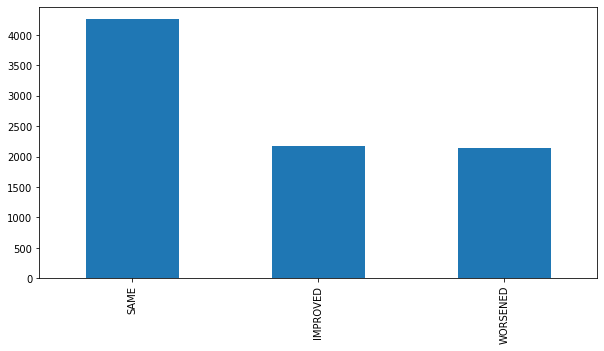

In [90]:
# frequency distribution of target variable : STATUS

plt.figure(figsize=(10,5))
df['status'].value_counts().plot(kind='bar')


As we visualize the distribution of data with respect to `Status` we observe that, the patients whose condition or symptom hasn't worsened or improved and remained in the same state is high.

Also, visualizing the distribution of the data with respect to age of the patients. It is visible that the age group of 20-35 are likely to get this disease `fibromyalgia`. Outlier could be age 43 abd 45 which has a hike in the bar plot.

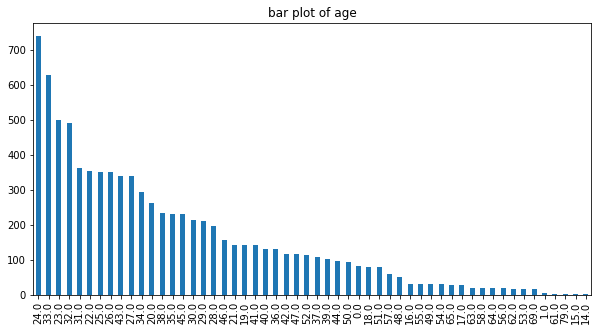

In [91]:
# Imbalanced classification
plt.figure(figsize=(10,5))
plt.title("bar plot of age")
df['age'].value_counts().plot(kind='bar')

In [92]:
# minimum and maximum age in the dataframe
df['age'].min(),example_df['age'].max()

(0.0, 79.0)

There is negative value in age column which is not practically possible so replacing them by NaN.

In [0]:
# ALl negative age is relaced by NaN
df = df.assign(age = lambda x: x.age.where(x.age.ge(0)))    

Data visualization with respect to `gender` and `country` is given below.

Text(0.5, 1.0, 'bar plot of gender')

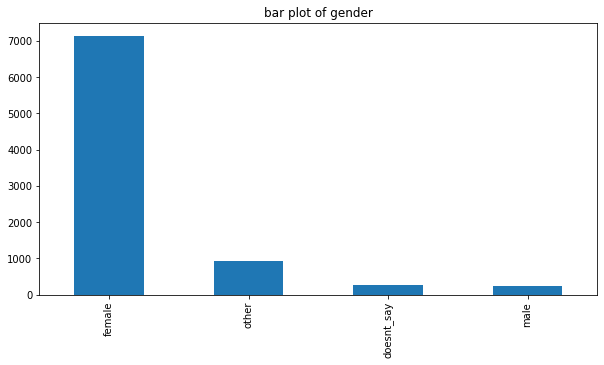

In [94]:
# 4 categories in gender and population of females are comparitively higher than rest
plt.figure(figsize=(10,5))
df['sex'].value_counts().plot(kind='bar')
plt.title("bar plot of gender")

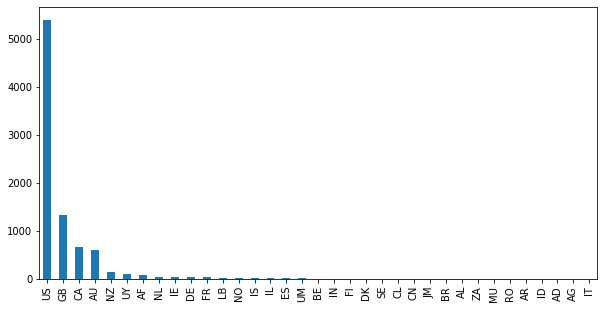

In [95]:
# top 4 countries from where we have large number of people are: US, GB, CA, AU
plt.figure(figsize=(10,5))
df['country'].value_counts().plot(kind='bar')

#### Gender wise distribution of age

The distribution of age for female and male is visualized below and it is visible that women between the age 20 and 35 are vulnerable to the disease than man. Also, significant amount of "Other" category people have also been exposed to this disease who also fall under the same age group.

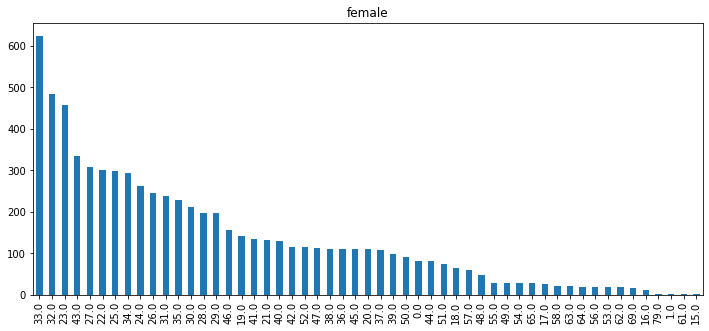

In [96]:
#age distribution according to genderwise
plt.figure(figsize=(12,5))
df_ = df[df['sex']=='female'].reset_index(drop=True)
plt.title("female")
df_['age'].value_counts().plot(kind='bar')

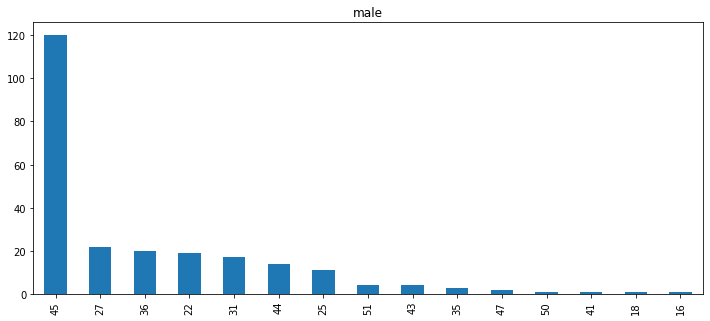

In [22]:
#age distribution according to genderwise
plt.figure(figsize=(12,5))
df_ = df[df['sex']=='male'].reset_index(drop=True)
plt.title("male")
df_['age'].value_counts().plot(kind='bar')

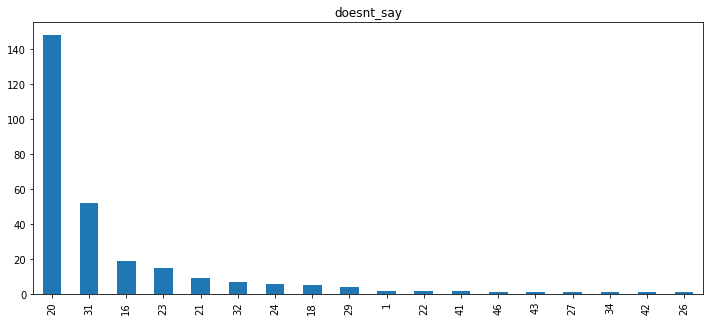

In [23]:
#age distribution according to genderwise
plt.figure(figsize=(12,5))
df_ = df[df['sex']=='doesnt_say'].reset_index(drop=True)
plt.title("doesnt_say")
df_['age'].value_counts().plot(kind='bar')

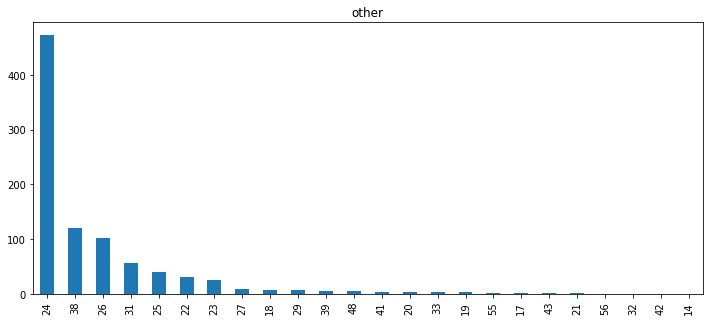

In [24]:
#age distribution according to genderwise
plt.figure(figsize=(12,5))
df_ = df[df['sex']=='other'].reset_index(drop=True)
plt.title("other")
df_['age'].value_counts().plot(kind='bar')

#### Age distribution according to `status` of the disease. 
As a conclusion, age is not looking as a strong factor for deciding status of the person (patient)

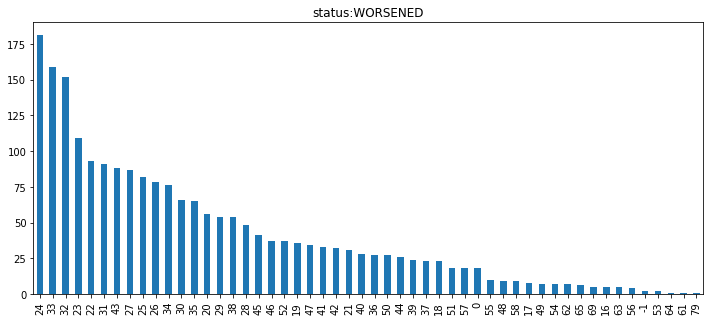

In [25]:
plt.figure(figsize=(12,5))
plt.title('other')
plt.title("status:WORSENED")
df_ = df[df['status']=='WORSENED'].reset_index(drop=True)
df_['age'].value_counts().plot(kind='bar')

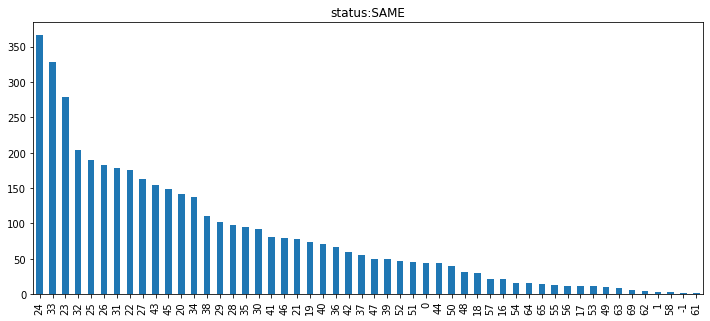

In [26]:
plt.figure(figsize=(12,5))
plt.title("status:SAME")
df_ = df[df['status']=='SAME'].reset_index(drop=True)
df_['age'].value_counts().plot(kind='bar')

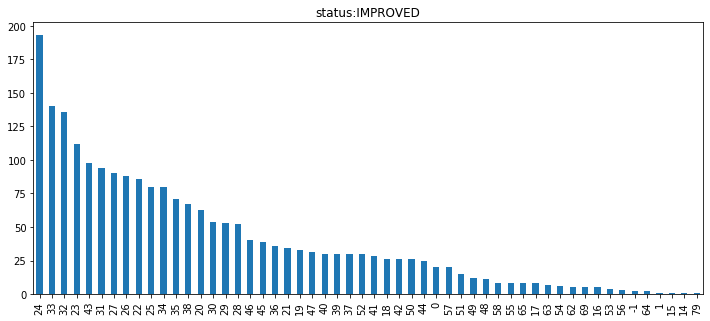

In [27]:
plt.figure(figsize=(12,5))
plt.title("status:IMPROVED")
df_ = df[df['status']=='IMPROVED'].reset_index(drop=True)
df_['age'].value_counts().plot(kind='bar')

### Feature-Engineering
### Making - supervised training dataset

The dataframe given has json content in entries_from and entries_to column. This can be cleaned and extracted into many formats that can be used for further analysis and modelling. One such format is explored below. The `trackable_type`, `trackable_name` are extracted from the json and displayed as seperate columns with corresponding `trackable_value` "from" and "to".

The `new_df(df)` function does the above mentioned job.

There are various other possible data munging that can be done for this particulate given dataframe to make it even more meaningful.

In [18]:
df.head()

,user_id,checkin_date_from,checkin_date_to,status,value_from,value_to,entries_from,entries_to,age,sex,country
0,2939,10/29/17,11/1/17,WORSENED,3,4,"[{'trackable_type': 'Symptom', 'trackable_name...","[{'trackable_type': 'Symptom', 'trackable_name...",37,female,CA
1,5525,9/24/17,9/26/17,IMPROVED,4,3,"[{'trackable_type': 'Condition', 'trackable_na...","[{'trackable_type': 'Condition', 'trackable_na...",24,female,GB
2,2586,6/22/17,6/23/17,SAME,3,3,"[{'trackable_type': 'Condition', 'trackable_na...","[{'trackable_type': 'Condition', 'trackable_na...",43,female,US
3,312,7/29/17,7/30/17,SAME,2,2,"[{'trackable_type': 'Condition', 'trackable_na...","[{'trackable_type': 'Condition', 'trackable_na...",23,female,AU
4,3064,5/30/15,5/31/15,WORSENED,1,2,"[{'trackable_type': 'Condition', 'trackable_na...","[{'trackable_type': 'Condition', 'trackable_na...",44,male,FR


In [0]:
DF = pd.DataFrame(columns=['user_id','checkin_date_from',
                         'checkin_date_to','age', 'sex','country','status',
                          'tracktable_type','tracktable_name','tracktable_value_from',
                          'tracktable_value_to',
                           ])

In [0]:
""" 
new_df(df) function is taking the json columns from the datafram and returns three seperate columns by extracting values from JSON. 
We are creating anempty dataframe of columns in "DF". Then inside the new_df(df) function, creating three empty dictionary from_sym2val ={},
val2key = {}, to_sym2val = {}. We continue reading the values from entires_from and entries_to columns into these dictionaries
In from_sym2val dict and to_sym2val dict, the key is trackable_name and the value is trackable_value
In val2key dict, the key is trackable_name again and the value is trackable_type
In the key_set, all trackable_names (basically all keys) are present
we are then appending the extracted values to the rest of the dataframe and returning the new dataframe.
"""
def new_df(df): 
    try:

        df2 = pd.DataFrame(columns=['user_id','checkin_date_from',
                         'checkin_date_to','age', 'sex','country','status',
                          'tracktable_type','tracktable_name','tracktable_value_from',
                          'tracktable_value_to',
                           ])
        json1_data = df['entries_from']

        json2_data = df['entries_to']

        from_sym2val ={}
        val2key = {}
        to_sym2val = {}


        for j in json1_data:
            from_sym2val[j['trackable_name']] = j['trackable_value']
            val2key[j['trackable_name']] = j['trackable_type']

        for j in json2_data:
            to_sym2val[j['trackable_name']] = j['trackable_value']
            val2key[j['trackable_name']] = j['trackable_type']

        keys_set = list(set(list(from_sym2val.keys())+list(to_sym2val.keys())))
        for k in keys_set:
            values =[df['user_id'],df['checkin_date_from'],df['checkin_date_to'],
            df['age'],df['sex'],df['country'],df['status']]
            values.append(val2key[k])
            values.append(k)
            if k in from_sym2val.keys():
                values.append(from_sym2val[k])
            else:
                values.append(np.NaN)
            if k in to_sym2val.keys():    
                values.append(to_sym2val[k])
            else:
                values.append(np.NaN)

            df2 = df2.append(pd.Series(values,index=['user_id','checkin_date_from',
                             'checkin_date_to','age', 'sex','country','status',
                              'tracktable_type','tracktable_name','tracktable_value_from',
                              'tracktable_value_to',
                               ]),ignore_index=True)
        return df2
    except Exception as err:
        print(err)

        return pd.DataFrame(columns=['user_id','checkin_date_from',
                         'checkin_date_to','age', 'sex','country','status',
                          'tracktable_type','tracktable_name','tracktable_value_from',
                          'tracktable_value_to',
                           ])

In [0]:
""" Applying the function to the existing data frame to get a new one"""

dfk = df.apply(new_df,axis=1)

In [0]:
for i in range(dfk.shape[0]):
    try:
        DF = pd.concat([DF,dfk[i]])
    except Exception as err:
        print(err)
        pass

In [0]:
 DF2 = DF.reset_index(drop=True)

In [0]:
DF2.to_csv('Final_train.csv',index= False)

In [0]:
DF2 = pd.read_csv("Final_train.csv", low_memory=False)
DF2 = DF2.sample(frac=1).reset_index(drop=True)

In [26]:
DF2.head()

,user_id,checkin_date_from,checkin_date_to,age,sex,country,status,tracktable_type,tracktable_name,tracktable_value_from,tracktable_value_to
0,8680,9/13/17,9/14/17,32,female,US,IMPROVED,Weather,precip_intensity,0.001,0.0004
1,1694,10/13/17,10/14/17,34,female,US,SAME,Condition,Depression,1,1
2,12316,3/12/17,3/13/17,35,female,AF,SAME,Weather,pressure,1019.0,1023.0
3,312,8/1/17,8/4/17,23,female,AU,IMPROVED,Treatment,Mersyndol,500mg paracetamol 9.6mg codeine,500mg paracetamol 9.6mg codeine
4,611,9/18/16,9/19/16,46,female,US,IMPROVED,Symptom,Bumps on tongue,0,0


In [27]:
DF2.shape

(223619, 11)

In [28]:
DF2.dtypes

user_id                   int64
checkin_date_from        object
checkin_date_to          object
age                       int64
sex                      object
country                  object
status                   object
tracktable_type          object
tracktable_name          object
tracktable_value_from    object
tracktable_value_to      object
dtype: object

In [29]:
DF2.isna().sum()

user_id                      0
checkin_date_from            0
checkin_date_to              0
age                          0
sex                          0
country                      0
status                       0
tracktable_type              0
tracktable_name              0
tracktable_value_from    10085
tracktable_value_to       7111
dtype: int64

NaN values is in `tracktable_value_from` and `tracktable_value_to` this indicates that `tracktable_name` is not present on that date therefore filling NaN with 0. NaN can be imputed with mean or median as well.

In [31]:
DF2.nunique()

user_id                   987
checkin_date_from         869
checkin_date_to           875
age                        55
sex                         4
country                    35
status                      3
tracktable_type             4
tracktable_name          3351
tracktable_value_from    1676
tracktable_value_to      1664
dtype: int64

### Data Preprocessing

Now, we are tring to calculate the difference between or the number of days between the checkin date (`checkin_date_from`) and check out date (`checkin_date_to`) so it gives an idea about how long the patient has been in the hospital. This can also contribute to the prediction of severity of the disease.

In [32]:
#convert to date type and adding number of days
dframe = DF2.copy()

dframe.fillna(0,inplace=True)

dframe['checkin_date_from']= pd.to_datetime(dframe['checkin_date_from']) 

dframe['checkin_date_to']= pd.to_datetime(dframe['checkin_date_to']) 

dframe['Days'] = (dframe['checkin_date_to'] - dframe['checkin_date_from']).dt.days

dframe.drop(['checkin_date_from','checkin_date_to'],axis=1,inplace=True)

dframe.head()


,user_id,age,sex,country,status,tracktable_type,tracktable_name,tracktable_value_from,tracktable_value_to,Days
0,8680,32,female,US,IMPROVED,Weather,precip_intensity,0.001,0.0004,1
1,1694,34,female,US,SAME,Condition,Depression,1,1,1
2,12316,35,female,AF,SAME,Weather,pressure,1019.0,1023.0,1
3,312,23,female,AU,IMPROVED,Treatment,Mersyndol,500mg paracetamol 9.6mg codeine,500mg paracetamol 9.6mg codeine,3
4,611,46,female,US,IMPROVED,Symptom,Bumps on tongue,0,0,1


Dropping `trackable_type` - `treatment` and `weather`.

`trackable_type` - `treatment` is very crucial in predicting the severity of the disease as it helps in unvieling the truth whether the treatement has improved the status of the patient or worsened or remained the same. But I am dropping it as it doesn't really fit in the dataframe that we have developed over here. 

In [0]:
#since value is not convertible to float
dframe.drop( dframe[dframe['tracktable_type']=='Treatment'].index,inplace=True)

#since value is not convertible to float
dframe.drop( dframe[dframe['tracktable_type']=='Weather'].index,inplace=True)

dframe.reset_index(drop=True,inplace=True)

dframe['tracktable_value_from'] = dframe['tracktable_value_from'].astype(float)
dframe['tracktable_value_to'] = dframe['tracktable_value_to'].astype(float)

In [34]:
dframe.shape

(168492, 10)

In [35]:
dframe.head()

,user_id,age,sex,country,status,tracktable_type,tracktable_name,tracktable_value_from,tracktable_value_to,Days
0,1694,34,female,US,SAME,Condition,Depression,1.0,1.0,1
1,611,46,female,US,IMPROVED,Symptom,Bumps on tongue,0.0,0.0,1
2,671,25,female,US,SAME,Symptom,Neck and shoulder pain,2.0,2.0,1
3,3006,31,doesnt_say,CA,WORSENED,Symptom,Insomnia,2.0,1.0,1
4,7659,32,female,US,WORSENED,Symptom,Tingling in hands and feet,1.0,2.0,1


In [0]:
dframe.fillna(0,inplace=True)

Encoding `sex` and `status` labels.

In [0]:
def encode_sex(df):
    label =df['sex']
    if label == 'female':
        return 0
    elif label == 'male':
        return 1
    elif label=='other':
        return 2
    else:
        return 3

In [0]:
def encode_labels(df):
    label =df['status']
    if label == 'IMPROVED':
        return 0
    elif label == 'WORSENED':
        return 1
    else:
        return 2

In [39]:
train_subset= dframe.copy()

train_subset['y'] = train_subset.apply(encode_labels,axis=1)

train_subset['gender']= train_subset.apply(encode_sex,axis=1)

train_subset.drop(['status','sex'],axis=1,inplace=True)

train_subset.head(2)

,user_id,age,country,tracktable_type,tracktable_name,tracktable_value_from,tracktable_value_to,Days,y,gender
0,1694,34,US,Condition,Depression,1.0,1.0,1,2,0
1,611,46,US,Symptom,Bumps on tongue,0.0,0.0,1,0,0


In [0]:
#since country is very less responsible for status
train_subset.drop(['country' ],axis=1,inplace=True)


In [0]:
le_type = preprocessing.LabelEncoder()
le_name = preprocessing.LabelEncoder()

le_type.fit(train_subset['tracktable_type'])

train_subset['tracktable_type']=le_type.transform(train_subset['tracktable_type']) 

le_name.fit(train_subset['tracktable_name'])
train_subset['tracktable_name']=le_name.transform(train_subset['tracktable_name']) 


In [42]:
train_subset.head()

,user_id,age,tracktable_type,tracktable_name,tracktable_value_from,tracktable_value_to,Days,y,gender
0,1694,34,0,340,1.0,1.0,1,2,0
1,611,46,1,186,0.0,0.0,1,0,0
2,671,25,1,1005,2.0,2.0,1,2,0
3,3006,31,1,754,2.0,1.0,1,1,3
4,7659,32,1,1504,1.0,2.0,1,1,0


### Training

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_subset, train_subset['y'],
                                                    train_size=0.7,shuffle=True, random_state=23123)

In [44]:
KNN = knn(n_neighbors=10)
KNN.fit(X_train ,y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
#trained on 10000 rows only since computation is taking high time


SVM = svm.SVC(cache_size=170000)
# SVM.fit(X_train[:10000] ,y_train[:10000] )
SVM.fit(X_train ,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Accuracy and confusion matrix plots

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize= True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### KNN

In [163]:
train_subset.columns

Index(['user_id', 'age', 'tracktable_type', 'tracktable_name',
       'tracktable_value_from', 'tracktable_value_to', 'Days', 'y', 'gender'],
      dtype='object')

In [0]:
y_pred =KNN.predict(X_test)

In [165]:
 print("the accuracy of the KNN model is  ", accuracy_score(y_test, y_pred))

the accuracy of the KNN model is   0.705843950304661


Normalized confusion matrix
[[0.6  0.15 0.26]
 [0.15 0.46 0.38]
 [0.05 0.07 0.88]]


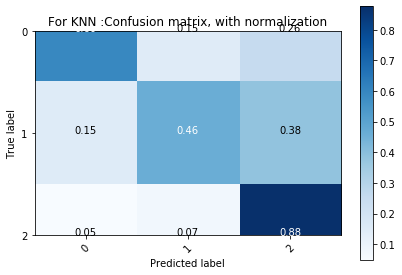

In [166]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred,labels=[0,  1, 2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2],
                      title='For KNN :Confusion matrix, with normalization')


### SVM

In [0]:
y_pred =SVM.predict(X_test)

In [168]:
print("the accuracy of the  SVM model is  ", accuracy_score(y_test, y_pred))

the accuracy of the  SVM model is   0.5380628313682044


Normalized confusion matrix
[[0.22 0.13 0.66]
 [0.11 0.13 0.76]
 [0.03 0.07 0.9 ]]


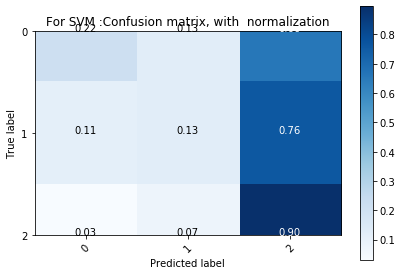

In [169]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred,labels=[0,  1, 2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2],
                      title='For SVM :Confusion matrix, with  normalization')


### Additional Questions

Please answer the following questions:

#### 1.   If you've explored the data, please describe your observations about the dataset.

- The disease mostly affect women
- People of 20-35 age seemed to be vulnerable to this disease 
- Top 4 countries from where we have large number of people with this disease diagnosed US, GB, CA, AU.
- Country is not having the affect on the target(status), 
- Age also did not seem to be a strong factor in affecting the status of person.

#### 2.   What approach (i.e. modeling & evaluation) did you use?

- Used supervised machine learning algorithm (K nearest neighbor and Support Vector Machine) for modeling and accuracy score for its evaluation.
- Also computed confusion matrix.
- 

3.   What features have you tried (please also include the ones that you do not include in your final model)?
4.   What tradeoffs did you consider? Why did you use this approach?
5.   How would you improve your model if you had more time?

